In [4]:
!pip3 install psycopg2

In [6]:
# Dependencies and Setup
from matplotlib import pyplot as plt 
import pandas as pd
import numpy as np
#from password import password
from scipy import stats
import os
import psycopg2 as pg2

In [135]:
# import data set to df
df = pd.read_csv('database.csv')
df.head()

C:\Users\sandy\anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,...,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
2,3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
3,4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
4,5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1,FBI


In [137]:
# drop unneeded columns
df = df.drop(columns=['Record ID', 'Agency Code', 'Agency Name', 'Agency Type', 'Record ID', 'Victim Count', 'Perpetrator Count', 'Record Source'])
df.head()

,City,State,Year,Month,Incident,Crime Type,Crime Solved,Victim Sex,Victim Age,Victim Race,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon
0,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,Yes,Male,14,Native American/Alaska Native,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object
1,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,Yes,Male,43,White,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation
2,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown
3,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,Yes,Male,43,White,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation
4,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown


In [140]:
base_homicide_info= df.drop(columns=['City', 'Month','Incident', 'Crime Solved'])
base_homicide_info.head()

,State,Year,Crime Type,Victim Sex,Victim Age,Victim Race,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon
0,Alaska,1980,Murder or Manslaughter,Male,14,Native American/Alaska Native,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object
1,Alaska,1980,Murder or Manslaughter,Male,43,White,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation
2,Alaska,1980,Murder or Manslaughter,Female,30,Native American/Alaska Native,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown
3,Alaska,1980,Murder or Manslaughter,Male,43,White,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation
4,Alaska,1980,Murder or Manslaughter,Female,30,Native American/Alaska Native,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown


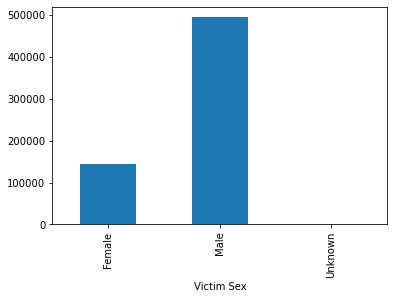

In [148]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.


In [146]:
Victim_info = base_homicide_info.drop(columns=['Crime Type', 'Perpetrator Sex', 'Perpetrator Age', 'Perpetrator Race', 'Perpetrator Ethnicity'])
Victim_info.head()

,State,Year,Victim Sex,Victim Age,Victim Race,Victim Ethnicity,Relationship,Weapon
0,Alaska,1980,Male,14,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object
1,Alaska,1980,Male,43,White,Unknown,Acquaintance,Strangulation
2,Alaska,1980,Female,30,Native American/Alaska Native,Unknown,Unknown,Unknown
3,Alaska,1980,Male,43,White,Unknown,Acquaintance,Strangulation
4,Alaska,1980,Female,30,Native American/Alaska Native,Unknown,Unknown,Unknown


In [ ]:
Victim_info = base_homicide_info.drop(columns=['Crime Type', 'Victim Sex', 'Victim Age', 'Victim Race', 'Victim Ethnicity'])
Victim_info.head()

In [60]:
df.set_index('State')

,City,Year,Month,Incident,Crime Type,Crime Solved,Victim Sex,Victim Age,Victim Race,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon
State,,,,,,,,,,,,,,,,
Alaska,Anchorage,1980,January,1,Murder or Manslaughter,Yes,Male,14,Native American/Alaska Native,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object
Alaska,Anchorage,1980,March,1,Murder or Manslaughter,Yes,Male,43,White,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation
Alaska,Anchorage,1980,March,2,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown
Alaska,Anchorage,1980,April,1,Murder or Manslaughter,Yes,Male,43,White,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation
Alaska,Anchorage,1980,April,2,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wyoming,Park,2014,January,1,Murder or Manslaughter,No,Male,30,White,Hispanic,Unknown,0,Unknown,Unknown,Unknown,Handgun
Wyoming,Sheridan,2014,June,1,Murder or Manslaughter,Yes,Male,62,White,Unknown,Male,57,White,Unknown,Acquaintance,Handgun
Wyoming,Sheridan,2014,September,1,Murder or Manslaughter,Yes,Female,0,Asian/Pacific Islander,Unknown,Female,22,Asian/Pacific Islander,Unknown,Daughter,Suffocation


In [101]:
df.set_index('Year')

,City,State,Month,Incident,Crime Type,Crime Solved,Victim Sex,Victim Age,Victim Race,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon
Year,,,,,,,,,,,,,,,,
1980,Anchorage,Alaska,January,1,Murder or Manslaughter,Yes,Male,14,Native American/Alaska Native,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object
1980,Anchorage,Alaska,March,1,Murder or Manslaughter,Yes,Male,43,White,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation
1980,Anchorage,Alaska,March,2,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown
1980,Anchorage,Alaska,April,1,Murder or Manslaughter,Yes,Male,43,White,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation
1980,Anchorage,Alaska,April,2,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014,Park,Wyoming,January,1,Murder or Manslaughter,No,Male,30,White,Hispanic,Unknown,0,Unknown,Unknown,Unknown,Handgun
2014,Sheridan,Wyoming,June,1,Murder or Manslaughter,Yes,Male,62,White,Unknown,Male,57,White,Unknown,Acquaintance,Handgun
2014,Sheridan,Wyoming,September,1,Murder or Manslaughter,Yes,Female,0,Asian/Pacific Islander,Unknown,Female,22,Asian/Pacific Islander,Unknown,Daughter,Suffocation


In [113]:
State_year_count= df.groupby(['Year','State']).agg({'Year':['count']})
State_year_count.reset_index(inplace = True)
State_year_count.head()

,Year,State,Year
,,,count
0,1980,Alabama,513
1,1980,Alaska,47
2,1980,Arizona,293
3,1980,Arkansas,214
4,1980,California,3590


In [115]:
# import data set to df
data_file = "universities_ranking.xlsx"
education_df = pd.read_excel(data_file, engine='openpyxl')
# Apply the function
education_df = education_df.replace(np.nan, 0)
education_df.head()

,University Name,IPEDS ID,State,2021,2020,2019,2018,2017,2016,2015,...,1995,1994,1993,1992,1991,1990,1989,1988,1986,1984
0,Princeton University,186131,New Jersey,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,2.0,2.0,2.0,4.0,4.0,2.0,2.0,4.0,4.0,4.0
1,Harvard University,166027,Massachusetts,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,1.0,1.0,1.0,1.0,1.0,3.0,4.0,2.0,2.0,2.0
2,Columbia University,190150,New York,3.0,3.0,3.0,5.0,5.0,4.0,4.0,...,9.0,11.0,10.0,9.0,10.0,11.0,8.0,18.0,0.0,0.0
3,Massachusetts Institute of Technology,166683,Massachusetts,4.0,3.0,3.0,5.0,7.0,7.0,7.0,...,4.0,4.0,5.0,6.0,6.0,7.0,5.0,11.0,11.0,10.0
4,Yale University,130794,Connecticut,4.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,2.0,3.0,1.0,1.0,3.0,2.0,3.0


In [194]:
#drop_education_df.reset_index().drop(columns=['index'])

In [116]:
education_df.set_index('State')

,University Name,IPEDS ID,2021,2020,2019,2018,2017,2016,2015,2014,...,1995,1994,1993,1992,1991,1990,1989,1988,1986,1984
State,,,,,,,,,,,,,,,,,,,,,
New Jersey,Princeton University,186131,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,2.0,2.0,2.0,4.0,4.0,2.0,2.0,4.0,4.0,4.0
Massachusetts,Harvard University,166027,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,1.0,1.0,1.0,1.0,1.0,3.0,4.0,2.0,2.0,2.0
New York,Columbia University,190150,3.0,3.0,3.0,5.0,5.0,4.0,4.0,4.0,...,9.0,11.0,10.0,9.0,10.0,11.0,8.0,18.0,0.0,0.0
Massachusetts,Massachusetts Institute of Technology,166683,4.0,3.0,3.0,5.0,7.0,7.0,7.0,7.0,...,4.0,4.0,5.0,6.0,6.0,7.0,5.0,11.0,11.0,10.0
Connecticut,Yale University,130794,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,2.0,3.0,1.0,1.0,3.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
New Jersey,Rutgers University-New Brunswick,186380,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
New York,Syracuse University,196413,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Texas,Texas A&M University-College Station,228723,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [177]:
# drop unneeded columns
drop_education_df = education_df.drop(columns=['University Name', 'IPEDS ID'])
# Apply the function
drop_education_df = drop_education_df.replace(np.nan, 0)

drop_education_df.head()

,State,2021,2020,2019,2018,2017,2016,2015,2014,2013,...,1995,1994,1993,1992,1991,1990,1989,1988,1986,1984
0,New Jersey,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,2.0,2.0,2.0,4.0,4.0,2.0,2.0,4.0,4.0,4.0
1,Massachusetts,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,...,1.0,1.0,1.0,1.0,1.0,3.0,4.0,2.0,2.0,2.0
2,New York,3.0,3.0,3.0,5.0,5.0,4.0,4.0,4.0,4.0,...,9.0,11.0,10.0,9.0,10.0,11.0,8.0,18.0,0.0,0.0
3,Massachusetts,4.0,3.0,3.0,5.0,7.0,7.0,7.0,7.0,6.0,...,4.0,4.0,5.0,6.0,6.0,7.0,5.0,11.0,11.0,10.0
4,Connecticut,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,2.0,3.0,1.0,1.0,3.0,2.0,3.0


In [195]:
#drop_education_df.drop(labels=None, axis=0)

In [ ]:
#(labels, axis=0 is equivalent to index=labels

In [199]:
drop_education_df.set_index('State')

,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,...,1995,1994,1993,1992,1991,1990,1989,1988,1986,1984
State,,,,,,,,,,,,,,,,,,,,,
New Jersey,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,2.0,2.0,2.0,4.0,4.0,2.0,2.0,4.0,4.0,4.0
Massachusetts,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,3.0,4.0,2.0,2.0,2.0
New York,3.0,3.0,3.0,5.0,5.0,4.0,4.0,4.0,4.0,4.0,...,9.0,11.0,10.0,9.0,10.0,11.0,8.0,18.0,0.0,0.0
Massachusetts,4.0,3.0,3.0,5.0,7.0,7.0,7.0,7.0,6.0,5.0,...,4.0,4.0,5.0,6.0,6.0,7.0,5.0,11.0,11.0,10.0
Connecticut,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,2.0,3.0,1.0,1.0,3.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
New Jersey,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
New York,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Texas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [200]:
# transpose the dataframe
df_transposed = drop_education_df.T 
df_transposed.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
State,New Jersey,Massachusetts,New York,Massachusetts,Connecticut,Illinois,California,Pennsylvania,Maryland,Illinois,...,Flordia,New York,Pennsylvania,DC,Pennsylvania,New Jersey,New York,Texas,Washington,Illinois
2021,1,2,3,4,4,6,6,8,9,9,...,49,0,0,0,0,0,0,0,0,0
2020,1,2,3,3,3,6,6,6,10,9,...,0,50,46,0,0,0,0,0,0,0
2019,1,2,3,3,3,3,7,8,10,10,...,0,49,49,0,0,0,0,0,0,0
2018,1,2,5,5,3,3,5,8,11,11,...,46,42,46,0,0,0,0,0,0,0


In [120]:
df_transposed.rename_axis('Year')

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
Year,,,,,,,,,,,,,,,,,,,,,
State,New Jersey,Massachusetts,New York,Massachusetts,Connecticut,Illinois,California,Pennsylvania,Maryland,Illinois,...,Flordia,New York,Pennsylvania,DC,Pennsylvania,New Jersey,New York,Texas,Washington,Illinois
2021,1,2,3,4,4,6,6,8,9,9,...,49,0,0,0,0,0,0,0,0,0
2020,1,2,3,3,3,6,6,6,10,9,...,0,50,46,0,0,0,0,0,0,0
2019,1,2,3,3,3,3,7,8,10,10,...,0,49,49,0,0,0,0,0,0,0
2018,1,2,5,5,3,3,5,8,11,11,...,46,42,46,0,0,0,0,0,0,0
2017,1,2,5,7,3,3,5,8,10,12,...,44,39,50,0,50,0,0,0,0,0
2016,1,2,4,7,3,4,4,9,10,12,...,0,41,0,0,47,0,0,0,0,0
2015,1,2,4,7,3,4,4,8,12,13,...,48,42,0,0,48,0,0,0,48,0
2014,1,2,4,7,3,5,5,7,12,12,...,47,41,0,0,37,0,0,0,0,0


In [125]:
#df_flip= df_transposed.groupby(['Year','State'])
df_transposed.reset_index(inplace = True)
df_transposed.head()

,index,0,1,2,3,4,5,6,7,8,...,51,52,53,54,55,56,57,58,59,60
0,State,New Jersey,Massachusetts,New York,Massachusetts,Connecticut,Illinois,California,Pennsylvania,Maryland,...,Flordia,New York,Pennsylvania,DC,Pennsylvania,New Jersey,New York,Texas,Washington,Illinois
1,2021,1,2,3,4,4,6,6,8,9,...,49,0,0,0,0,0,0,0,0,0
2,2020,1,2,3,3,3,6,6,6,10,...,0,50,46,0,0,0,0,0,0,0
3,2019,1,2,3,3,3,3,7,8,10,...,0,49,49,0,0,0,0,0,0,0
4,2018,1,2,5,5,3,3,5,8,11,...,46,42,46,0,0,0,0,0,0,0


In [160]:
# Combine the data into a single dataset
merge_data_df = pd.merge(State_year_count, df_transposed, on="index")
merge_data_df.head()

C:\Users\sandy\anaconda3\envs\PythonData\lib\site-packages\pandas\core\reshape\merge.py:618: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


KeyError: 'index'